<a href="https://colab.research.google.com/github/mortezakhorsandnikoo/GAN/blob/master/conditional_gan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [13]:
training_parameters = {
    "n_epochs": 100,
    "batch_size": 100
}
data_loader = torch.utils.data.DataLoader(

  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=training_parameters["batch_size"], shuffle=True)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

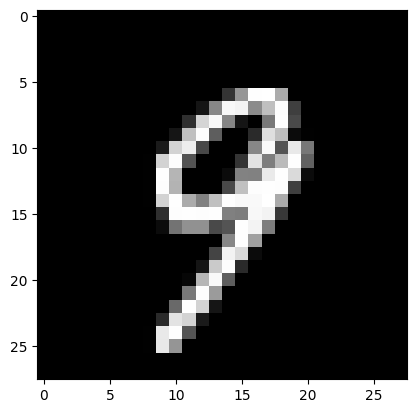

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

for x,_ in data_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break

In [5]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100 + 10
        output_dim = 784
        self.label_embedding = nn.Embedding(10, 10)

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),          #nn.Linear(in_features, out_features, bias=True)
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)                         #torch.cat(tensors, dim=0, *, out=None)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)


In [6]:
class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784 + 10
        output_dim = 1
        self.label_embedding = nn.Embedding(10, 10)

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x, c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

In [8]:
loss = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

[0/100]: loss_d: 0.582, loss_g: 1.082
[1/100]: loss_d: 0.584, loss_g: 1.087
[2/100]: loss_d: 0.585, loss_g: 1.072
[3/100]: loss_d: 0.592, loss_g: 1.057
[4/100]: loss_d: 0.591, loss_g: 1.068
[5/100]: loss_d: 0.590, loss_g: 1.059
[6/100]: loss_d: 0.597, loss_g: 1.037
[7/100]: loss_d: 0.601, loss_g: 1.020
[8/100]: loss_d: 0.600, loss_g: 1.024
Training Steps Completed:  499
6


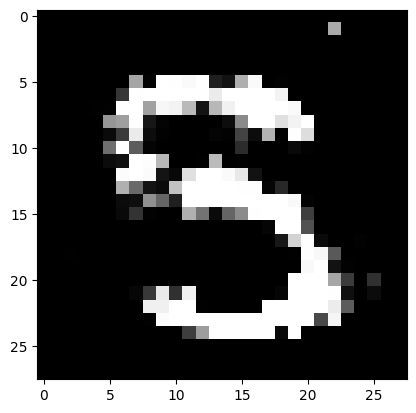

[9/100]: loss_d: 0.598, loss_g: 1.045
[10/100]: loss_d: 0.597, loss_g: 1.029
[11/100]: loss_d: 0.602, loss_g: 1.014
[12/100]: loss_d: 0.608, loss_g: 0.998
[13/100]: loss_d: 0.606, loss_g: 1.007
[14/100]: loss_d: 0.608, loss_g: 0.996
[15/100]: loss_d: 0.618, loss_g: 0.959
[16/100]: loss_d: 0.616, loss_g: 0.972
[17/100]: loss_d: 0.615, loss_g: 0.983
[18/100]: loss_d: 0.612, loss_g: 0.983
Training Steps Completed:  499
8


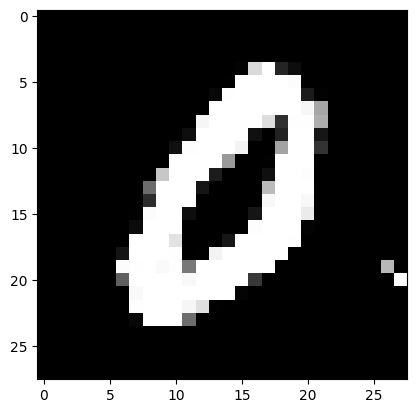

[19/100]: loss_d: 0.615, loss_g: 0.967
[20/100]: loss_d: 0.619, loss_g: 0.961
[21/100]: loss_d: 0.617, loss_g: 0.958
[22/100]: loss_d: 0.619, loss_g: 0.952
[23/100]: loss_d: 0.621, loss_g: 0.955
[24/100]: loss_d: 0.617, loss_g: 0.967
[25/100]: loss_d: 0.622, loss_g: 0.942
[26/100]: loss_d: 0.624, loss_g: 0.951
[27/100]: loss_d: 0.621, loss_g: 0.949
[28/100]: loss_d: 0.634, loss_g: 0.908
Training Steps Completed:  499
9


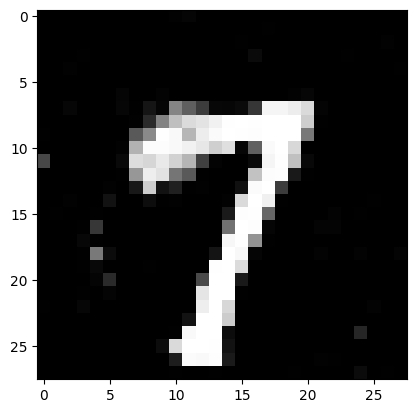

[29/100]: loss_d: 0.626, loss_g: 0.951
[30/100]: loss_d: 0.629, loss_g: 0.919
[31/100]: loss_d: 0.630, loss_g: 0.913
[32/100]: loss_d: 0.632, loss_g: 0.911
[33/100]: loss_d: 0.636, loss_g: 0.898
[34/100]: loss_d: 0.635, loss_g: 0.905
[35/100]: loss_d: 0.629, loss_g: 0.936
[36/100]: loss_d: 0.633, loss_g: 0.916
[37/100]: loss_d: 0.634, loss_g: 0.907
[38/100]: loss_d: 0.633, loss_g: 0.918
Training Steps Completed:  499
9


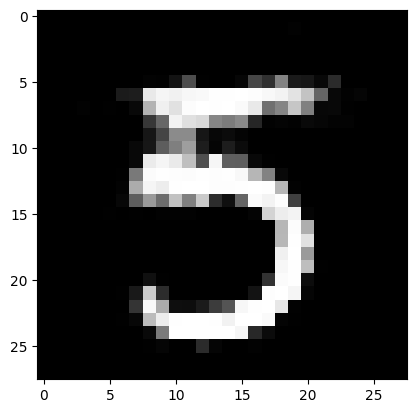

[39/100]: loss_d: 0.634, loss_g: 0.908
[40/100]: loss_d: 0.637, loss_g: 0.893
[41/100]: loss_d: 0.636, loss_g: 0.913
[42/100]: loss_d: 0.632, loss_g: 0.919
[43/100]: loss_d: 0.632, loss_g: 0.904
[44/100]: loss_d: 0.640, loss_g: 0.886
[45/100]: loss_d: 0.637, loss_g: 0.885
[46/100]: loss_d: 0.640, loss_g: 0.900
[47/100]: loss_d: 0.635, loss_g: 0.915
[48/100]: loss_d: 0.636, loss_g: 0.904
Training Steps Completed:  499
1


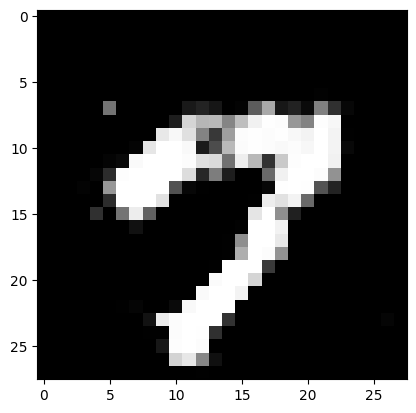

[49/100]: loss_d: 0.643, loss_g: 0.877
[50/100]: loss_d: 0.643, loss_g: 0.868
[51/100]: loss_d: 0.643, loss_g: 0.879
[52/100]: loss_d: 0.641, loss_g: 0.898
[53/100]: loss_d: 0.638, loss_g: 0.888
[54/100]: loss_d: 0.646, loss_g: 0.861
[55/100]: loss_d: 0.646, loss_g: 0.871
[56/100]: loss_d: 0.646, loss_g: 0.864
[57/100]: loss_d: 0.645, loss_g: 0.866
[58/100]: loss_d: 0.648, loss_g: 0.866
Training Steps Completed:  499
6


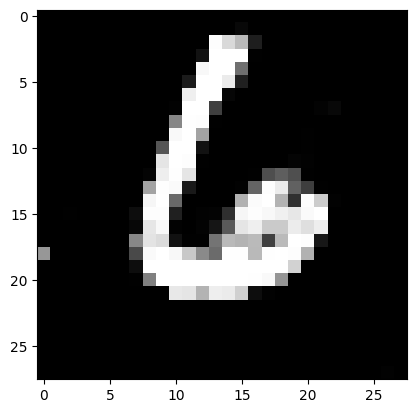

[59/100]: loss_d: 0.646, loss_g: 0.873
[60/100]: loss_d: 0.642, loss_g: 0.884
[61/100]: loss_d: 0.646, loss_g: 0.885
[62/100]: loss_d: 0.650, loss_g: 0.847
[63/100]: loss_d: 0.649, loss_g: 0.853
[64/100]: loss_d: 0.647, loss_g: 0.866
[65/100]: loss_d: 0.648, loss_g: 0.864
[66/100]: loss_d: 0.647, loss_g: 0.866
[67/100]: loss_d: 0.643, loss_g: 0.875
[68/100]: loss_d: 0.645, loss_g: 0.883
Training Steps Completed:  499
5


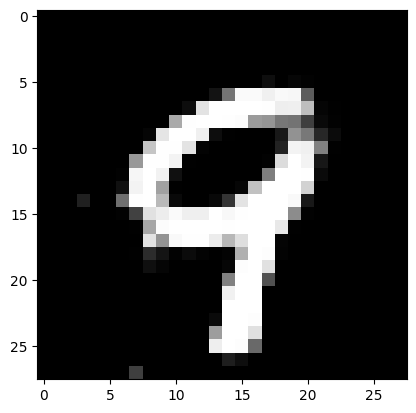

[69/100]: loss_d: 0.648, loss_g: 0.861
[70/100]: loss_d: 0.652, loss_g: 0.841
[71/100]: loss_d: 0.651, loss_g: 0.845
[72/100]: loss_d: 0.653, loss_g: 0.838
[73/100]: loss_d: 0.652, loss_g: 0.858
[74/100]: loss_d: 0.648, loss_g: 0.869
[75/100]: loss_d: 0.647, loss_g: 0.865
[76/100]: loss_d: 0.648, loss_g: 0.855
[77/100]: loss_d: 0.657, loss_g: 0.826
[78/100]: loss_d: 0.653, loss_g: 0.850
Training Steps Completed:  499
3


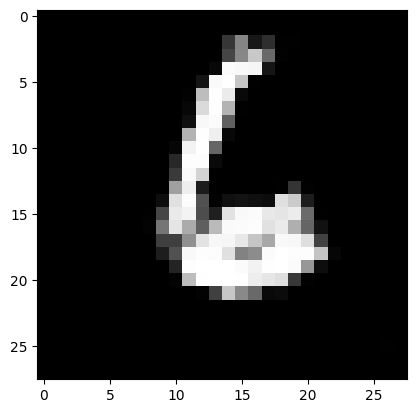

[79/100]: loss_d: 0.650, loss_g: 0.858
[80/100]: loss_d: 0.650, loss_g: 0.851
[81/100]: loss_d: 0.656, loss_g: 0.834
[82/100]: loss_d: 0.650, loss_g: 0.855
[83/100]: loss_d: 0.650, loss_g: 0.848
[84/100]: loss_d: 0.654, loss_g: 0.848
[85/100]: loss_d: 0.649, loss_g: 0.855
[86/100]: loss_d: 0.655, loss_g: 0.829
[87/100]: loss_d: 0.661, loss_g: 0.817
[88/100]: loss_d: 0.659, loss_g: 0.828
Training Steps Completed:  499
9


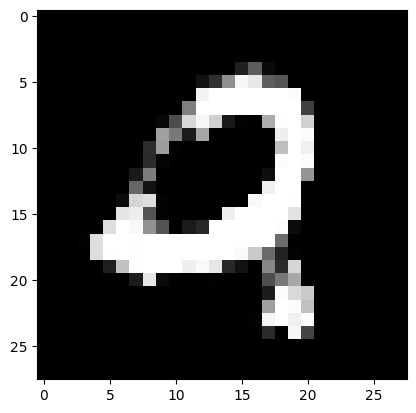

[89/100]: loss_d: 0.649, loss_g: 0.858
[90/100]: loss_d: 0.650, loss_g: 0.854
[91/100]: loss_d: 0.651, loss_g: 0.850
[92/100]: loss_d: 0.651, loss_g: 0.859
[93/100]: loss_d: 0.650, loss_g: 0.847
[94/100]: loss_d: 0.652, loss_g: 0.850
[95/100]: loss_d: 0.653, loss_g: 0.841
[96/100]: loss_d: 0.658, loss_g: 0.833
[97/100]: loss_d: 0.654, loss_g: 0.844
[98/100]: loss_d: 0.654, loss_g: 0.833
Training Steps Completed:  499
4


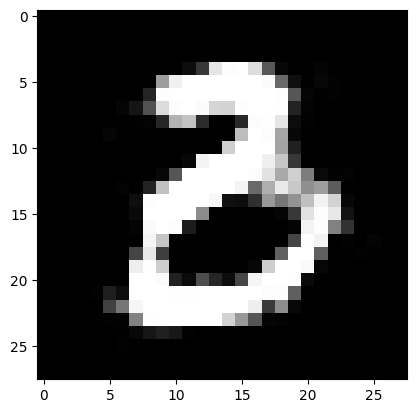

[99/100]: loss_d: 0.659, loss_g: 0.826


In [15]:
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(data_loader):


        noise = torch.randn(batch_size,100).to(device)
        fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
        generated_data = generator(noise, fake_labels)                  # batch_size X 784


        # Discriminator
        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1].to(device) # batch_size
        true_labels = torch.ones(batch_size).to(device)

        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data, digit_labels).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach(), fake_labels).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )

        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2

        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())


        # Generator
        generator_optimizer.zero_grad()
        # It's a choice to generate the data again
        generated_data = generator(noise, fake_labels) # batch_size X 784
        discriminator_output_on_generated_data = discriminator(generated_data, fake_labels).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        G_loss.append(generator_loss.data.item())


        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)

            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
                generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    print(fake_labels[8].item())
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))